<a href="https://colab.research.google.com/github/tirtho109/Capstone-Project-IBM-Data-Science/blob/main/Assignments/00-EntryTask_MLP_FashionMNIST/tirtho109/Deep_Learning_SoSe2022_EntryTask_T.S.Saha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img align="right" width="400" height="100" src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg">](https://www.tu-braunschweig.de/en/) 

[Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) \([m.maboudi@tu-bs.de](m.maboudi@tu-bs.de)) and [Pedro Diaz](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz) (p.diaz@tu-bs.de)

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)  
[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/igp)  


**Image classification using MLP**  

# Deep Learning Entry Task

## 1. Import all necessary packages

In [ ]:
# !pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score

## 2. Load the [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist]) for image classification and show some samples 
It is also available in [PyTorch datasets](https://pytorch.org/vision/stable/datasets.html) and [TensorFlow datasets](https://www.tensorflow.org/datasets)

### 2.1 Loading the dataset

In [ ]:
mnist = keras.datasets.fashion_mnist

In [ ]:
type(mnist)

module

In [ ]:
# mnist.load_data()

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
np.max(X_train) , np.mean(X_train) , Y_train

(255, 72.94035223214286, array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [ ]:
class_names = ["T-shirt", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag", "Ankle boot"]

### 2.2 Visualizing the dataset

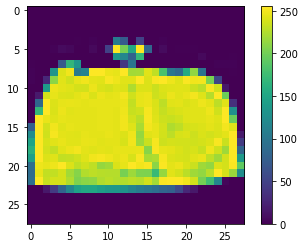

In [ ]:
plt.figure()
plt.imshow(X_train[109]) # plt.imshow(X_tain[#] or X_test[#] or X_val[#])
plt.colorbar()

In [ ]:
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(60000, 784).astype("float32")/255
X_test = X_test.reshape(10000, 784).astype("float32")/255

Y_train = Y_train.astype("float32")
Y_test = Y_test.astype("float32")

In [ ]:
# Reserve 10,000 samples for validation
X_val = X_train[-10000:]
Y_val = Y_train[-10000:]
X_train = X_train[:-10000]
Y_train = Y_train[:-10000]

In [ ]:
X_val.shape, Y_val.shape, X_train.shape, Y_train.shape , X_test.shape

((10000, 784), (10000,), (50000, 784), (50000,), (10000, 784))

## 3. Create a **Multi Layer Perceptron (MLP)** for image classification.
Feel free to use any configuration and framework for its implementation (Keras, Tensorflow, Pytorch, etc.)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
#
model = Sequential() 
model.add(Flatten(input_shape = (784,), name = "Input")) 
model.add(Dense(128, activation = "relu", name="Layer1"))
model.add(Dense(128, activation = "relu", name="Layer2"))
model.add(Dense(10, activation = "softmax", name="Output"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 784)               0         
                                                                 
 Layer1 (Dense)              (None, 128)               100480    
                                                                 
 Layer2 (Dense)              (None, 128)               16512     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## 4. Train the model

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(), 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"] )

In [ ]:
print("Fit model on training data")
history = model.fit(
    X_train,
    Y_train,
    epochs=10,
    validation_data=(X_val, Y_val),
)

Fit model on training data
Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 0.5011 - accuracy: 0.8213 - val_loss: 0.4086 - val_accuracy: 0.8487
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3696 - accuracy: 0.8648 - val_loss: 0.3651 - val_accuracy: 0.8669
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3339 - accuracy: 0.8779 - val_loss: 0.3495 - val_accuracy: 0.8778
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3100 - accuracy: 0.8844 - val_loss: 0.3357 - val_accuracy: 0.8788
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2917 - accuracy: 0.8919 - val_loss: 0.3437 - val_accuracy: 0.8763
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2762 - accuracy: 0.8965 - val_loss: 0.3268 - val_accuracy: 0.8850
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2618 - accuracy: 0.9023 - val_

In [ ]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3675 - accuracy: 0.8760
0.8759999871253967


## 5. Plots
Plot the evolution of the Loss function and Accuracy values over the epochs during training.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


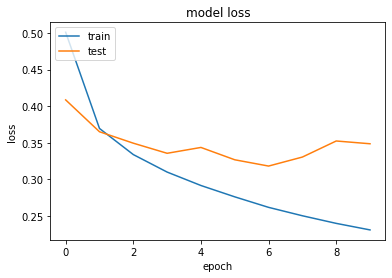

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

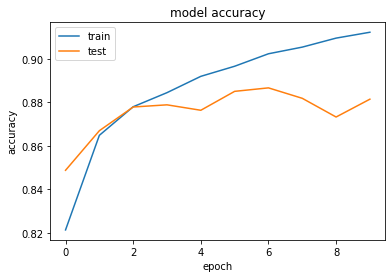

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 6. Run inference
Run inference in the test set and compute the metrics for testing.

In [ ]:
Y_pred = np.argmax(model.predict(X_test), axis = -1)

In [ ]:
accuracy_score(Y_test, Y_pred)

0.876

In [ ]:
pred = model.predict(X_test)
pred.shape

(10000, 10)

## 7. Test samples
Show some samples from the test set: image, reference class and predicted class.

In [ ]:
test_sample = 156

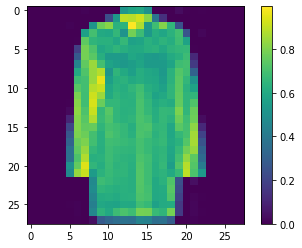

In [ ]:
plt.figure()
plt.imshow(X_test[test_sample].reshape(28,28)) # plt.imshow(X_tain[#] or X_test[#] or X_val[#])
#plt.savefig('test_sample.png')
plt.colorbar()

In [ ]:
pred[test_sample]

array([9.72039852e-05, 7.33299430e-06, 2.32648151e-03, 2.87491739e-01,
       6.00265920e-01, 1.92502441e-08, 1.09799027e-01, 2.28554349e-08,
       1.21219055e-05, 2.02785259e-07], dtype=float32)

In [ ]:
class_names[np.argmax(pred[test_sample])] #class based on prediction 

'Coat'

In [ ]:
class_names[int(Y_test[test_sample])] #true class

'Coat'

In [ ]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
model.save('model')
model.save_weights('model.h5')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


## 8. Testing with rotation
Choose one image from the test set, apply a rotation (e.g. 30°, 45°, 60°).

In [ ]:
x30 = X_test[test_sample].reshape(28,28,1)

In [ ]:
x30 = tf.keras.preprocessing.image.random_rotation(
                                            x30,
                                            30,
                                            row_axis=1,
                                            col_axis=2,
                                            channel_axis=0
                                        )

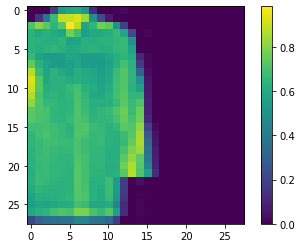

In [ ]:
plt.figure()
plt.imshow(x30.reshape(28,28)) # plt.imshow(X_tain[#] or X_test[#] or X_val[#])
#plt.savefig('test_sample.png')
plt.colorbar()

In [ ]:
x45 = X_test[test_sample].reshape(28,28,1)
x45 = tf.keras.preprocessing.image.random_rotation(
                                            x45,
                                            45,
                                            row_axis=1,
                                            col_axis=2,
                                            channel_axis=0
                                        )

In [ ]:
x60 = X_test[test_sample].reshape(28,28,1)
x60 = tf.keras.preprocessing.image.random_rotation(
                                            x60,
                                            60,
                                            row_axis=1,
                                            col_axis=2,
                                            channel_axis=0
                                        )

## 9. Comparison
Compare the predicted classes before and after the rotation. Is there any change? If yes, what would be the reason for it?

In [ ]:
model1 = keras.models.load_model('model')
model1.load_weights('model.h5')

In [ ]:
class_names[int(Y_test[test_sample])]  #true class

'Coat'

In [ ]:
pred30 = np.argmax(model1.predict(x30.reshape(1,784)))
class_names[pred30]   # possible wrong classification 

'Bag'

In [ ]:
pred45 = np.argmax(model1.predict(x45.reshape(1,784)))
class_names[pred45]   # possible wrong classification 

'Sneaker'

In [ ]:
pred60 = np.argmax(model1.predict(x60.reshape(1,784)))
class_names[pred60]   # possible wrong classification 

'Shirt'

## 10. Testing with new image
Test the model with another image (from internet or take a photo with your phone). Do not forget to convert the image to the Fashion MNIST format: grayscale, $28\times 28$. Comment the results.

In [ ]:
# importing modules
import urllib.request
from PIL import Image, ImageOps

urllib.request.urlretrieve(
  'https://i.pinimg.com/originals/2f/38/43/2f384343ea340d35e06423cbb4b374fd.jpg',
   "test_from_internet.png") 
#urllib.request.urlretrieve('https://thumbs.dreamstime.com/z/white-blank-t-shirt-back-isolated-black-background-141258402.jpg',"test_from_internet.png")
   
  
img = Image.open("test_from_internet.png")
img.show()

In [ ]:
#matching dimensions
dimensions = (28,28)
img = img.resize(dimensions)
img.save('resized_test_from_internet.jpg')
#converting into grayscale Image
img = ImageOps.grayscale(img)

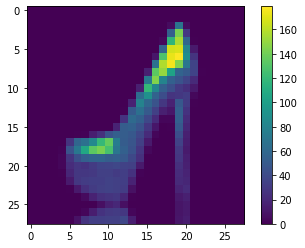

In [ ]:
plt.figure()
plt.imshow(img)
plt.colorbar()

In [ ]:
#converting Image object into numpy array
test_data = np.array(img) / 255.0
test_data.shape

(28, 28)

In [ ]:
pred_iamge_from_internet = np.argmax(model1.predict(test_data.reshape(1,784)))
pred_iamge_from_internet

5

In [ ]:
class_names[pred_iamge_from_internet]

'Sandal'

## 11. How could we improve the trained model?

May be applying suitable regularization could solve the problem of overfitting. Another approach could be to use convolutional neural network to get more accurate prediction after rotating the test sample. Increasing the capacity of the neural network could improve the trained model.